# Exploring Advertising Impact: Linear, Multiple Linear, and Polynomial Regression Analysis

## Problem Statement:
The objective of this project is to analyze the impact of different advertising channels (TV, Radio, and Newspaper) on product sales. We aim to investigate linear relationships between each advertising medium and sales, explore the potential improvement in model efficiency through multiple linear regression, and assess the applicability of polynomial regression to capture non-linear patterns in the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import tkinter as tk
from tkinter import ttk
from IPython.display import display, HTML

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Function for linear regression model
def linear_regression_model(X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    # Reshape X to 2D array if it's a single feature
    if len(x_train.shape) == 1:
        x_train = np.array(x_train).reshape(-1, 1)
        x_test = np.array(x_test).reshape(-1, 1)
        X = X.values.reshape(-1, 1)    

    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)

    # Model evaluation
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred) * 100

    print('MSE:', mse)
    print('RMSE', rmse)
    print('MAE:', mae)
    print("Accuracy: %.2f" % r2)
    
    # Plotting for simple linear regression
    if X.shape[1] == 1:
        plt.plot(x_train, lr.predict(x_train), color="r")
        plt.scatter(X, y, color="b", label="Actual")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend()
        plt.show()
    # Plotting for multiple linear regression
    elif X.shape[1] > 1:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], y_test, c='b', marker='o', label='Actual')
        ax.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], y_pred, c='r', marker='x', label='Predicted')
        ax.set_xlabel(X.columns[0])
        ax.set_ylabel(X.columns[1])
        ax.set_zlabel(y.name)
        plt.legend()
        plt.show()

In [3]:
# Function for polynomial regression model
def polynomial_regression_model(X, y, degree=2):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Reshape X to 2D array if it's a single feature
    if len(x_train.shape) == 1:
        x_train = np.array(x_train).reshape(-1, 1)
        x_test = np.array(x_test).reshape(-1, 1)
        X = X.values.reshape(-1, 1)

    pf = PolynomialFeatures(degree)
    x_train_poly = pf.fit_transform(x_train)
    x_test_poly = pf.transform(x_test)

    lr = LinearRegression()
    lr.fit(x_train_poly, y_train)
    y_pred = lr.predict(x_test_poly)

    # Model evaluation
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred) * 100

    print('MSE:', mse)
    print('RMSE', rmse)
    print('MAE:', mae)
    print("Accuracy: %.2f" % r2)

    # Plotting for polynomial regression
    if X.shape[1] == 1:
        plt.scatter(X, y, color="b", label="Actual")
        plt.scatter(X, lr.predict(pf.transform(X)), color="r", label="Predicted")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.legend()
        plt.show()
    elif X.shape[1] > 1:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], y_test, c='b', marker='o', label='Actual')
        ax.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], y_pred, c='r', marker='x', label='Predicted')
        ax.set_xlabel(X.columns[0])
        ax.set_ylabel(X.columns[1])
        ax.set_zlabel(y.name)
        plt.legend()
        plt.show()

In [4]:
# Reading dataset
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

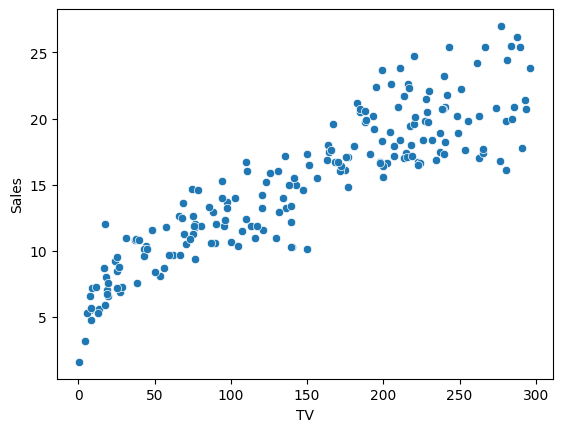

In [9]:
# visualize to check linear relationship
plt.figure()
sns.scatterplot(x='TV',y='Sales',data=df)
plt.show()
# we can observe there is linear relationship between TV(feature) and Sales(Target), but correlation cannot be 1 due to distributed data.

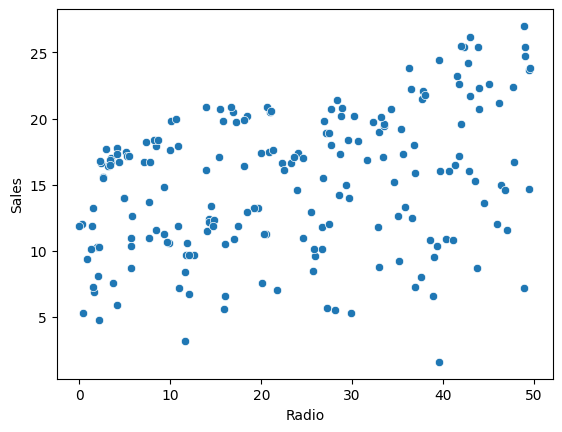

In [10]:
plt.figure()
sns.scatterplot(x='Radio',y='Sales',data=df)
plt.show()
# we can observe there is linear relationship between Radio and Sales, but correlation between data is poor due to distributed data

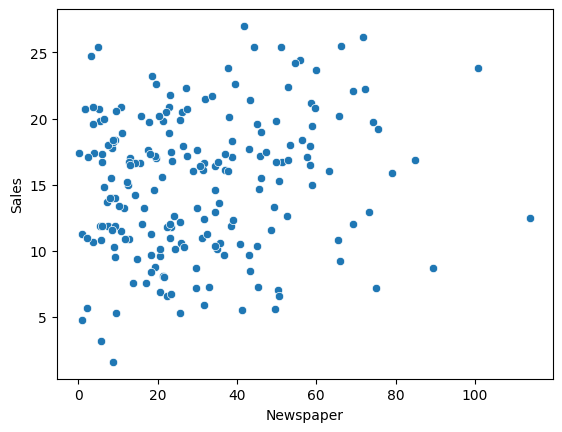

In [11]:
plt.figure()
sns.scatterplot(x='Newspaper',y='Sales',data=df)
plt.show()
# no linear relationship between Newspaper and Sales

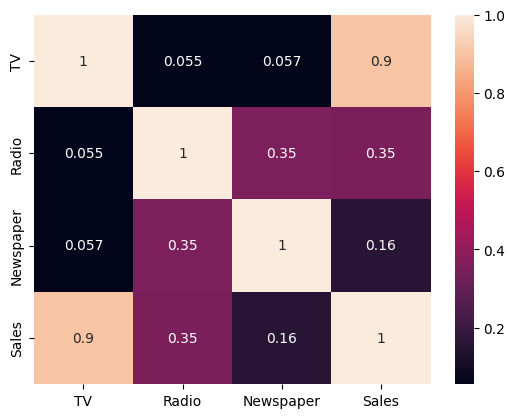

In [12]:
# to check correlation between data
plt.figure()
sns.heatmap(df.corr(),annot=True)
plt.show()

MSE: 5.143558863773587
RMSE 2.267941547697733
MAE: 1.86239036505223
Accuracy: 79.85


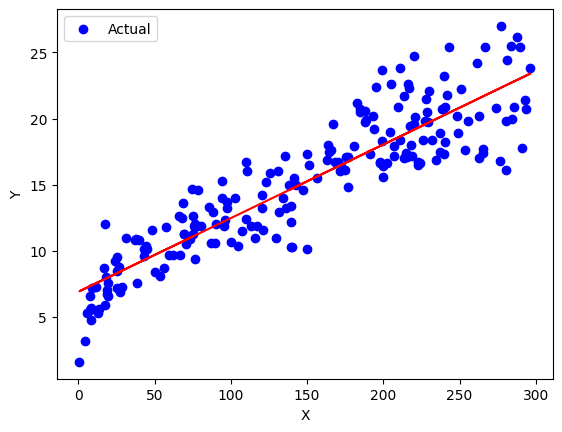

In [13]:
# Linear regression model for TV and Sales
linear_regression_model(df['TV'], df['Sales'])

MSE: 22.079207158307437
RMSE 4.698851685072368
MAE: 4.129189952623039
Accuracy: 13.49


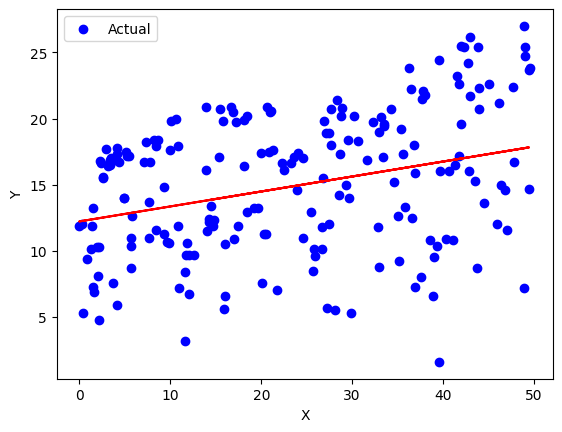

In [14]:
# Linear regression model for Radio and Sales
linear_regression_model(df['Radio'], df['Sales'])

MSE: 26.05927191114068
RMSE 5.104828293991942
MAE: 4.384239973311935
Accuracy: -2.10


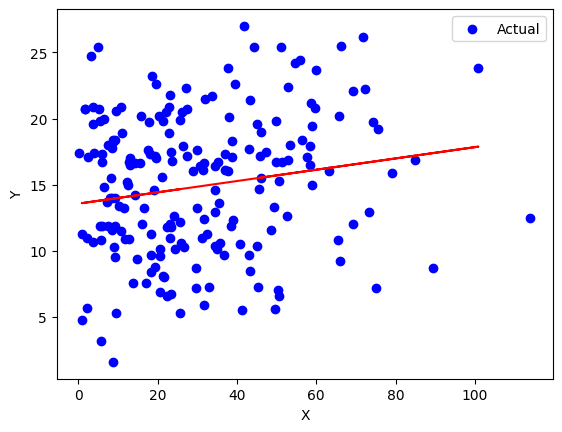

In [15]:
# Linear regression model for Newspaper and Sales
linear_regression_model(df['Newspaper'], df['Sales'])

MSE: 2.364506943376236
RMSE 1.5376953350310443
MAE: 1.191975327783676
Accuracy: 90.74


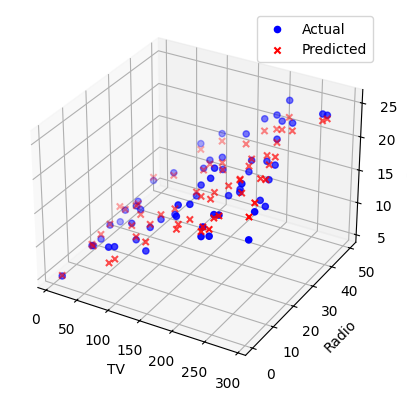

In [16]:
# Multiple linear regression model for [TV, Radio] and Sales
linear_regression_model(df[['TV', 'Radio']], df['Sales'])

MSE: 4.653959229545596
RMSE 2.157303694324375
MAE: 1.7736534047176915
Accuracy: 81.77


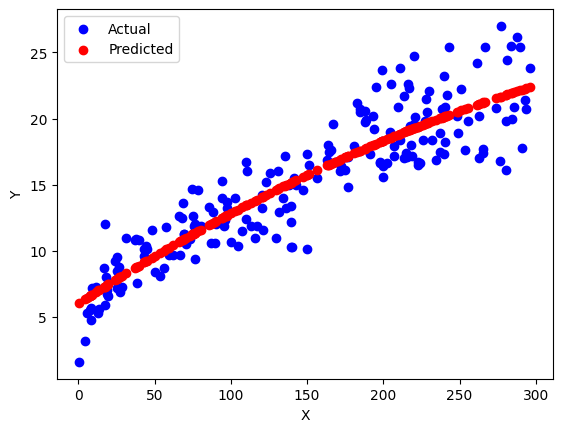

In [17]:
# Polynomial regression model for TV and Sales
polynomial_regression_model(df['TV'], df['Sales'], degree=2)

MSE: 21.914054238181617
RMSE 4.6812449453304215
MAE: 4.12863356060183
Accuracy: 14.14


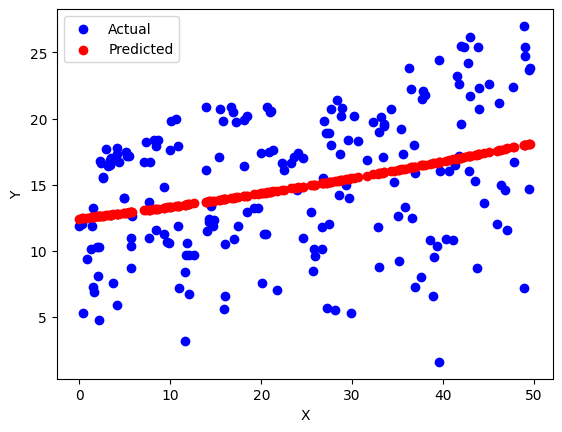

In [18]:
# Polynomial regression model for Radio and Sales
polynomial_regression_model(df['Radio'], df['Sales'], degree=2)

MSE: 1.4561026730448037
RMSE 1.2066907942985243
MAE: 0.9476471686239127
Accuracy: 94.29


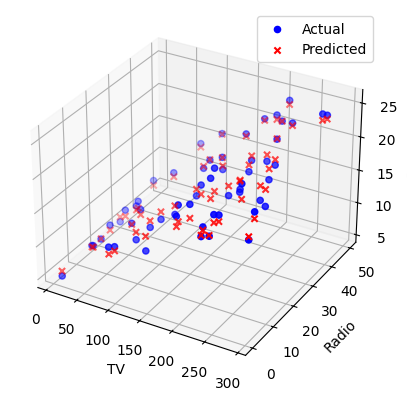

In [19]:
# Polynomial regression model for [TV,Radio] and Sales
polynomial_regression_model(df[['TV','Radio']], df['Sales'], degree=2)

## Results:

### Linear Regression Model:
- **Selected Feature:** TV
- **Target Variable:** Sales
- **Result:**
  - Mean Squared Error (MSE): 5.1435
  - Accuracy (R-squared): 79.85%

### Multiple Linear Regression Model:
- **Selected Features:** TV, Radio
- **Target Variable:** Sales
- **Result:**
  - Mean Squared Error (MSE): 2.3645
  - Accuracy (R-squared): 90.74%

### Polynomial Regression Model:
- **Selected Features:** TV, Radio
- **Target Variable:** Sales
- **Result:**
  - Mean Squared Error (MSE): 1.4561
  - Accuracy (R-squared): 94.29%

## Conclusion:
- The linear regression model provides valuable insights into the individual impact of TV advertising on sales.
- Multiple linear regression, incorporating TV and Radio, enhances model accuracy by considering the combined effect of both channels.
- Polynomial regression captures non-linear relationships, providing a more flexible model for complex advertising impact patterns.

This analysis helps in optimizing advertising strategies, guiding decisions based on the most influential channels, and understanding the nuances of the relationship between advertising efforts and sales.